## Google Data Analytics Professional Certificate
## Case Study 1: How Does a Bike-Share Navigate Speedy Success?

**Prepared by Faiz Yah, 1st January 2023, Lyon France**

[Link](https://www.coursera.org/professional-certificates/google-data-analytics)  to the course.

[Link](https://divvy-tripdata.s3.amazonaws.com/index.html) to the data set.

# 1. Introduction

### 1.1 Scenario
You work as a junior data analyst. A new project arises from the company called **Cyclistic**, a bike-share company in Chicago. According to the director of marketing, **maximizing the number of annual memberships** will contribute to the company's future sucess. 

Essentially, the objective of the project is **to understand how casual riders and annual members use Cyclistic bikes differently.** The marketing team will then be able to utilise the data analyzation findings and insights to help them in their data-driven decisions. 

To clarify some terms, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **annual members** are those who purchase annual memberships.

This project will be analyzing the data for the **year 2021.**

### 1.2 Company background
The company, **Cyclistic** was launched in 2016. They have now grown to have a fleet of 5,824 bicycles and a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to
any other station in the system anytime.

### 1.3 Analyzation method
- This case study will be analyzed using **Google's 6 Steps of the Data Analysis Process**.
- The 6 steps are: **ask, prepare, process, analyze, share,** and **act.**
- The project was advised to be carried out using SQL, RStudio and Tableau, but I will only be using **Python** for my own practice.

## 2. Ask Phase

During the "Ask" phase, we ask many questions, and also questions about the questions, as specfic as possible. These questions aims to identify what problems we need to solve while considering the needs of the stakeholders. This phase helps us to dive deeper into the problem in order to obtain better clarity and understanding of the problem. 

Deliverable: **clear statement of the business task.**

### 2.1 Business task
As mentioned in the introduction, the main task of the project is **to understand how casual riders and annual members use Cyclistic bikes differently** for the year 2021.

## 3. Prepare Phase

During the "Prepare" phase, we prepare our data collection methodology. Do we require qualitative or quantitative data, do we collect our data through surveys, interviews or existing sources, how do we avoid bias during the data collection process, these are all relevant questions needed to be answered during this phase.

Deliverable: **descriptions of all data sources used.**

### 3.1 Descriptions of data sources used
The [data set](https://divvy-tripdata.s3.amazonaws.com/index.html) used has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).

## 4. Process Phase
The "Process" phase is where the data collected are being processed, this includes connecting the data sources, cleaning the data, filtering and choosing the data, calculating the confidence level of the data etc.

Deliverable: **documentation of any cleaning or manipulation of data**.

### 4.1 Documentation of data cleaning and manipulation
I will be using **Pandas** for the data cleaning and manipulations. 
The actions that I carried out are as follows:

1. Since the data for each month are in a seperate file, I import each file individually.
2. Then I merge these files into one data frame which enable me to analyze them in term of the year 2021.
3. Identify the columns and type of each column of the data frame.
4. Check for null values.
    - Drop the null values (if any), and reconfirm that there are no longer null values
5. Delete the columns that are not necessary.
6. Check for duplicates.
    - Drop the duplicated values (if any), and reconfirm that there are no longer duplicated values
7. Modify the data type of certain column.
    - Convert _**started_at**_ column and _**ended_at**_ column from  "object" to "datetime64"
    - To **extract the hour, day, month and date** to form new columns based on them
    - To calculate the **ride duration**
8. Check the order of the day, month.
9. Create a new column _**ride_duration**_ that calculates the duration of each ride.
    - Express the ride duration in terms of only **minutes** , and not **minutes and seconds**
    - Check whether there are **negative values** for the ride duration which would be illogical
    - Remove the rows that have negative values
10. Export the file of the cleaned data.

### 4.1.1 Read each csv file individually

In [1]:
import pandas as pd

# Since the data for each month are in a seperate file, I import each file individually

jan_2021 = pd.read_csv('2021_01.csv')
feb_2021 = pd.read_csv('2021_02.csv')
march_2021 = pd.read_csv('2021_03.csv')
april_2021 = pd.read_csv('2021_04.csv')
may_2021 = pd.read_csv('2021_05.csv')
june_2021 = pd.read_csv('2021_06.csv')
july_2021 = pd.read_csv('2021_07.csv')
august_2021 = pd.read_csv('2021_08.csv')
sept_2021 = pd.read_csv('2021_09.csv')
oct_2021 = pd.read_csv('2021_10.csv')
nov_2021 = pd.read_csv('2021_11.csv')
dec_2021 = pd.read_csv('2021_12.csv')

### 4.1.2 Merge each month into one single year of 2021

In [2]:
# Merge these files into one data frame which enable me to analyze them in term of the year 2021

df = pd.concat([jan_2021, feb_2021, march_2021, april_2021, 
                may_2021, june_2021, july_2021, august_2021, 
                sept_2021, oct_2021,nov_2021, dec_2021])

### 4.1.3 Identify the information of the data frame

In [3]:
# Identify the columns and their respective data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


We can identify that there are a total of 12 columns, 4 of which has the data type **'float64'**, while 9 has the data type **'object'**.

### 4.1.4 Check for null values

In [4]:
# Check the amount of null values for each column

df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

From the result, we can identify that there are around 70k null values for some of the columns.

In [5]:
# Delete the null values, then reconfirm that the amount of null values are now 0

df.dropna(inplace = True)
df.isnull().sum() 

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

After dropping the null values, the result now shows that there are no longer any null values.

### 4.1.5 Delete columns that are unnecessary

In [6]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id',
             'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 9 to 247539
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 210.0+ MB


Since there are certain columns that will not be analyze, it is better to drop them completely for the purpose of clarity and neatness, sometimes less is more.

### 4.1.6 Check for duplicated values

In [7]:
df.duplicated().sum()

0

We are all good to go since there are no duplicated values, if there are, we should drop them too.

### 4.1.7 Convert column data type 

We will be converting the column type for two columns, __**started_at**__ column and __**ended_at**__ column from the data type **"object"** to the data type **"datetime64"**

There are 2 reasons for this:
- To **extract the hour, day, month and date** to form new columns based on them
- To calculate the **ride duration**

In [8]:
# To check the current data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 9 to 247539
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 210.0+ MB


In [9]:
df["started_at"] = df["started_at"].astype('datetime64')
df["ended_at"] = df["ended_at"].astype('datetime64')

# To check the updated data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 9 to 247539
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 210.0+ MB


We have successfully conver the data type from **"object"** to **"datetime64"**

### 4.1.8 Create new columns that specify the hour, the day, the month, the year of each ride. 

In [10]:
df['hour'] = df['started_at'].dt.hour # Toextract the hour
df['day'] = df['started_at'].dt.day_name() # Toextract the day of the week
df['date'] = df['started_at'].dt.day #To extract the date
df['month'] = df['started_at'].dt.month_name() # To extract the month
df['year'] = df['started_at'].dt.year #To extract the year


df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,member,19,Sunday,24,January,2021
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,member,12,Saturday,23,January,2021
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,casual,15,Saturday,9,January,2021
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,casual,15,Saturday,9,January,2021
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,casual,15,Sunday,24,January,2021


### 4.1.9 Check the order of the day, month

In [11]:
df.groupby(['member_casual', 'day'])['ride_id'].count() # Check order for the day

member_casual  day      
casual         Friday       290045
               Monday       228936
               Saturday     468331
               Sunday       403789
               Thursday     224207
               Tuesday      214937
               Wednesday    218134
member         Friday       365787
               Monday       346488
               Saturday     357082
               Sunday       311240
               Thursday     373474
               Tuesday      388132
               Wednesday    397720
Name: ride_id, dtype: int64

The days are not arranged in the order that we want, so we have to arrange them

In [12]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)
df.groupby(['member_casual', 'day'])['ride_id'].count() 

member_casual  day      
casual         Monday       228936
               Tuesday      214937
               Wednesday    218134
               Thursday     224207
               Friday       290045
               Saturday     468331
               Sunday       403789
member         Monday       346488
               Tuesday      388132
               Wednesday    397720
               Thursday     373474
               Friday       365787
               Saturday     357082
               Sunday       311240
Name: ride_id, dtype: int64

The days are now ordered accordingly as we want, which is Monday - Friday.

In [13]:
# Now we repeat for the month

df.groupby(['member_casual', 'month'])['ride_id'].count() # Check order for the month

member_casual  month    
casual         April        120420
               August       341476
               December      45076
               February       8613
               January       14690
               July         369415
               June         304192
               March         75642
               May          216829
               November      69978
               October      189117
               September    292931
member         April        177787
               August       332933
               December     131295
               February      34383
               January       68819
               July         322906
               June         304586
               March        130049
               May          234165
               November     185926
               October      288855
               September    328219
Name: ride_id, dtype: int64

The months are not arranged in the order that we want, so we have to arrange them

In [14]:
# Arrange the month

month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True)
df.groupby(['member_casual', 'month'])['ride_id'].count() 

member_casual  month    
casual         January       14690
               February       8613
               March         75642
               April        120420
               May          216829
               June         304192
               July         369415
               August       341476
               September    292931
               October      189117
               November      69978
               December      45076
member         January       68819
               February      34383
               March        130049
               April        177787
               May          234165
               June         304586
               July         322906
               August       332933
               September    328219
               October      288855
               November     185926
               December     131295
Name: ride_id, dtype: int64

Perfect! The months are now arranged as wanted, which is January - December.

### 4.1.10 Create new column that calculate the duration of each ride

In [15]:
df['ride_duration'] = (df['ended_at'] - df['started_at'])/ pd.Timedelta(minutes=1) 
#Express the ride duration in terms of only minutes , and not minutes and seconds

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,member,19,Sunday,24,January,2021,7.216667
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,member,12,Saturday,23,January,2021,4.533333
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,casual,15,Saturday,9,January,2021,9.783333
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,casual,15,Saturday,9,January,2021,8.950000
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,casual,15,Sunday,24,January,2021,10.150000


### 4.1.11 Verify if there are negative values for the duration of ride, which is not logical

In [16]:
df[df['ride_duration'] < 0].count()

ride_id          116
rideable_type    116
started_at       116
ended_at         116
member_casual    116
hour             116
day              116
date             116
month            116
year             116
ride_duration    116
dtype: int64

Apparently there are 166 rides with negative durations which are not logical, so we have to delete them

In [17]:
df = df[df['ride_duration'] > 0] # Remove the rows
df[df['ride_duration'] < 0].count() # Verify

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
day              0
date             0
month            0
year             0
ride_duration    0
dtype: int64

We reconfirmed now that the rides with negative durations have been succesfully ommitted.

In [18]:
df.sort_values(by = ['ride_duration'], ascending = True).head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
397932,80EBF2D4ED9F1CD6,classic_bike,2021-07-27 18:57:58,2021-07-27 18:57:59,casual,18,Tuesday,27,July,2021,0.016667
181547,17471ADEE413A595,classic_bike,2021-08-22 20:41:16,2021-08-22 20:41:17,member,20,Sunday,22,August,2021,0.016667
308715,D00E0C5398D32CA2,docked_bike,2021-07-15 22:06:34,2021-07-15 22:06:35,casual,22,Thursday,15,July,2021,0.016667
76874,ECC244CE74D8CFFE,classic_bike,2021-01-27 09:01:20,2021-01-27 09:01:21,member,9,Wednesday,27,January,2021,0.016667
273114,3169A3DE42575A9C,classic_bike,2021-04-18 14:20:48,2021-04-18 14:20:49,member,14,Sunday,18,April,2021,0.016667


We can also verify by sorting the duration ascendingly, then identify whether the smallest value is positive.

We can see that the shortest duration which is 0.167 minute is positive, therefore all the negative values have been deleted succesfully.

### 4.1.12 Export the cleaned file.

In [19]:
df.to_csv("cycle_cleaned.csv")

## 5. Analyze and Share Phase
The "Analyze" phase is where we perform exploratory data analysis, in which we analyze the cleaned data through aggregation (sum, max, mean etc), calculation, correlation etc. This is also the phase where we identify what story does the data tell, their relationships and trends.

The "Share" phase is where we decide what to present and share with the stakeholders. Do we present our data through reports, dashboards or meetings etc. This is also the phase where we create compelling data visualizations that provides insights for the stakeholders.

Deliverable: **A summary of analysis with supporting visualizations and key findings**

### 5.1 Analysis summary with visualizations
The analysis will be using **Pandas** and **Plotly express** for the data visualizations
The questions that I explored were:
1. Numbers about the casual riders and membered riders
    - 1.1 Considering all the rides during 2021, how many were taken by casual and membered riders?
    - 1.2 What are the percentage of them?
    
2. Numbers of rides
    - 2.1 Numbers of rides by member types across hours.
    - 2.2 Numbers of rides by member types across days of the weeks.
    - 2.3 Numbers of rides by member types across the months.
    
3. Ride durations
    - 3.1 Ride durations by member types across days.

4. Type of bikes
    - 4.1 Which type of bikes are most popular by member types across the months?

In [20]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('cycle_cleaned.csv')
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
0,9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,member,19,Sunday,24,January,2021,7.216667
1,10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,member,12,Saturday,23,January,2021,4.533333
2,11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,casual,15,Saturday,9,January,2021,9.783333
3,12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,casual,15,Saturday,9,January,2021,8.950000
4,13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,casual,15,Sunday,24,January,2021,10.150000


### 5.2 Numbers about the casual and membered riders.

### 5.2.1 Considering all the rides during 2021, how many were taken by casual and membered riders?

In [22]:
members_amount1 = df['member_casual'].value_counts() # Method 1
members_amount1

member    2539802
casual    2048302
Name: member_casual, dtype: int64

In [23]:
members_amount2 = df.groupby('member_casual', as_index=False)['ride_id'].count()
members_amount2

,member_casual,ride_id
0,casual,2048302
1,member,2539802


We can see that of the **4.5 million rides** during 2021, 2.0 million of rides were from casual riders while 2.5 million were from membered riders.

This also implied that there were **500k more rides** taken by the **membererd** riders.

**Explanation**: This is an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.2.2 Percentage of the casual and membered riders.

In [24]:
member_percentage = np.round(df['member_casual'].value_counts(normalize = True)*100, 2)
member_percentage 

member    55.36
casual    44.64
Name: member_casual, dtype: float64

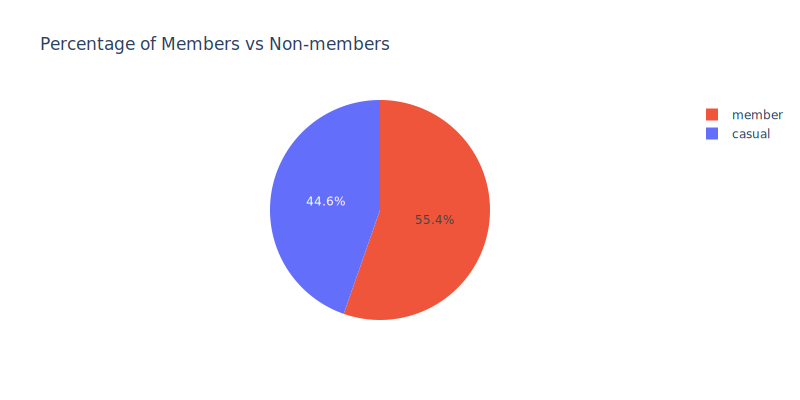

In [25]:
fig = px.pie(members_amount2, values = 'ride_id', names='member_casual', color='member_casual',
       title='Percentage of Members vs Non-members', width=800, height=400)

fig.show("svg")

Now we visualize the above numbers through a pie chart to obtain a better visuals and understanding.

**Explanation**: Similary, this is also an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.3 Numbers of rides.

### 5.3.1 Numbers of rides by member types across hours.

In [26]:
rides_hour = df.groupby(['member_casual','hour'], as_index=False)['ride_id'].count()
rides_hour

,member_casual,hour,ride_id
0,casual,0,42321
1,casual,1,30667
2,casual,2,19579
3,casual,3,10220
4,casual,4,6688
5,casual,5,8823
6,casual,6,19406
7,casual,7,36024
8,casual,8,49678
9,casual,9,60885


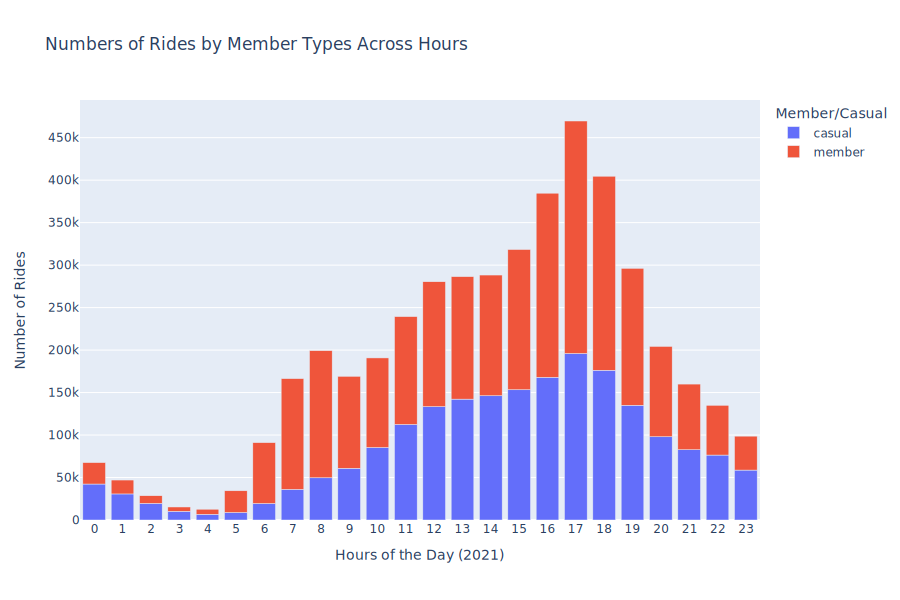

In [27]:
fig = px.bar(rides_hour, x = 'hour', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'hour':'Hours of the Day (2021)', 
                       'member_casual':'Member/Casual'}, title='Numbers of Rides by Member Types Across Hours'
             ,width=900, height=600)

fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show('svg')

From the stacked bar graph, we can clearly see that the peak time for bike usage are in between 4pm to 6pm.

**Explanation**: The peak time for bike usage are in between **4pm to 6pm**, most possibly because it is the time where people finish and **leave their work** from the office.

### 5.3.2 Numbers of rides by member types across days.

In [28]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)  #To order the days accordingly

rides_day = df.groupby(['member_casual','day'], as_index=False)['ride_id'].count()
rides_day

,member_casual,day,ride_id
0,casual,Monday,228931
1,casual,Tuesday,214932
2,casual,Wednesday,218129
3,casual,Thursday,224204
4,casual,Friday,290034
5,casual,Saturday,468318
6,casual,Sunday,403754
7,member,Monday,346476
8,member,Tuesday,388120
9,member,Wednesday,397681


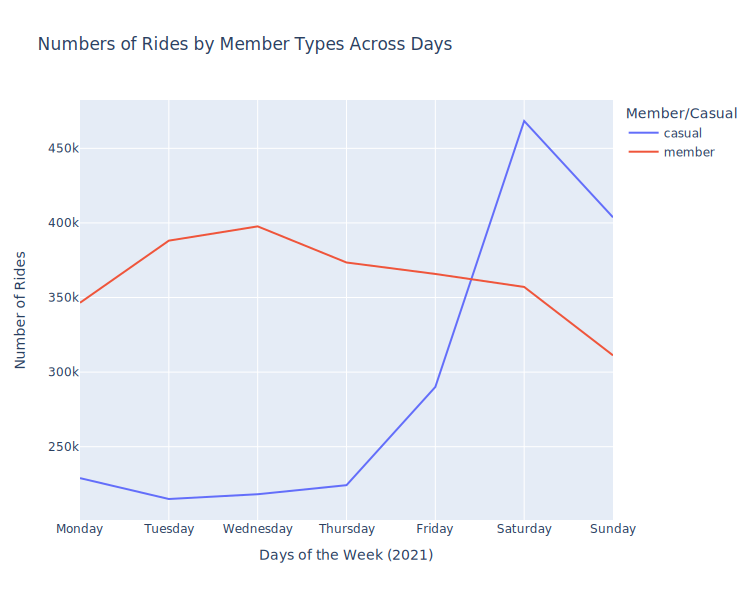

In [29]:
fig = px.line(rides_day, x = 'day', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'day':'Days of the Week (2021)', 
                       'member_casual':'Member/Casual'}, title= 'Numbers of Rides by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we can identify some interesting findings:
1. **Casual riders** rode the bikes mainly during the **weekends (Friday to Sunday)**.
2. **Membered riders** rode the bikes mainly during the **week days (Monday - Friday)**, and their usage remained **relatively steady** throughout the entire week.

Explanation:
1. **Casual riders** rode the bikes generally only during the weekends **for leisure**, and not routinely to work.
2. **Membered riders** rode the bikes **routinely to work**.

### 5.3.3 Numbers of rides by member types across months.

In [30]:
month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True) #Order the months

rides_month = df.groupby(['member_casual','month'], as_index=False)['ride_id'].count()
rides_month

,member_casual,month,ride_id
0,casual,January,14690
1,casual,February,8613
2,casual,March,75641
3,casual,April,120418
4,casual,May,216823
5,casual,June,304184
6,casual,July,369401
7,casual,August,341463
8,casual,September,292920
9,casual,October,189115


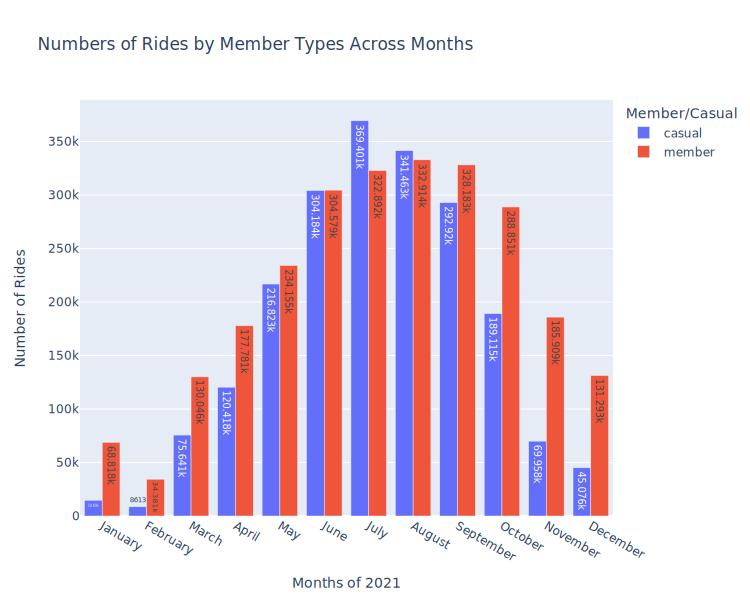

In [31]:
fig = px.bar(rides_month, x = 'month', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'month':'Months of 2021', 
                       'member_casual':'Member/Casual'}, barmode='group', text_auto = True,
             title= 'Numbers of Rides by Member Types Across Months',
             width=750, height=600)


fig.show('svg')

From the grouped bar graph, we can identify some interesting findings:
1. The **peak months** were during the **summer season (June - August)** and early **autumn (September)**.
2. The months of **January and February** had the **least amount** of rides.
2. During the **peak months**, **casual riders** were **more** than membered riders.
3. **Outside** of peak months, **membered riders** were **more** than casual riders.



Explanation:
1. The summer and early autumn season has **warmer weather** which encouraged people to do more outdoor activities, including cycling.
2. January and February were during the **winter season** which was generally **too cold** for outdoor cycling.
3. Casual riders rode the bikes during the **summer** for **leisure purposes** in order to **profit the good warmer weather**.
3. Membered riders rode the bikes mainly for **work routinely**.

### 5.4 Ride durations

### 5.4.1 Ride duration by member types across days

In [32]:
ride_duration_day = df.groupby(['member_casual', 'day'], as_index=False)['ride_duration'].mean()
ride_duration_day

,member_casual,day,ride_duration
0,casual,Monday,32.637242
1,casual,Tuesday,28.803354
2,casual,Wednesday,28.269635
3,casual,Thursday,28.011003
4,casual,Friday,30.919069
5,casual,Saturday,34.872406
6,casual,Sunday,37.603605
7,member,Monday,12.725203
8,member,Tuesday,12.388018
9,member,Wednesday,12.458150


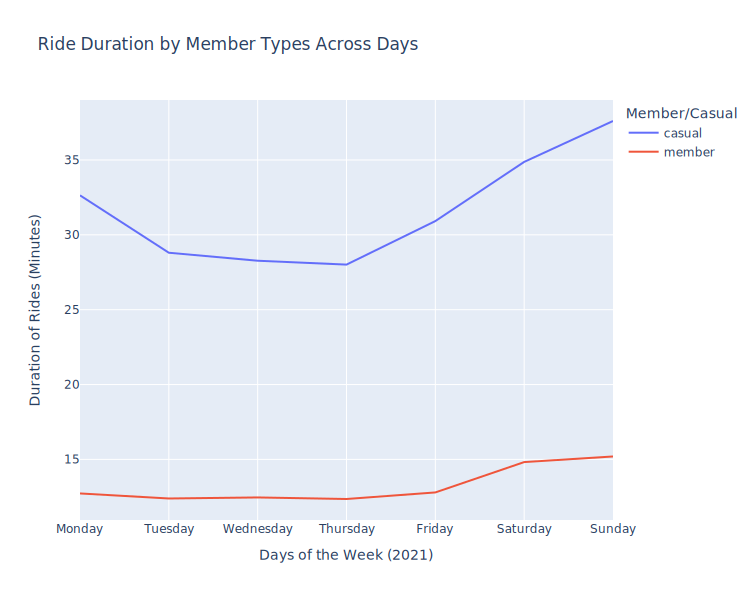

In [33]:
fig = px.line(ride_duration_day, x = 'day', y = 'ride_duration', color = 'member_casual', 
             labels = {'ride_duration':'Duration of Rides (Minutes)', 'day':'Days of the Week (2021)', 
                       'member_casual':'Member/Casual'}, title= 'Ride Duration by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we obtain that:
1. The duration of rides for **casual riders** were **much higher** than membered riders, almost upwards of 2.5-3.0 times.
2. The duration of rides **increased during the week end**, and especially much higher for casual riders.

Explanation:
1. **Casual riders** did not ride the bikes as regularly, and only rode them generally for **leisure**, while **membered riders** rode the bikes **routinely for work**.
2. People had **more time for leisure** during the **weekend** and were able to rode the bikes longer.

### 5.5  Type of bikes

### 5.5.1  Which types of bikes are most popular

In [34]:
bikes_popularirty_day = df.groupby(['member_casual','rideable_type', 'day'], as_index = False)['ride_id'].count()
bikes_popularirty_day

,member_casual,rideable_type,day,ride_id
0,casual,classic_bike,Monday,135327.0
1,casual,classic_bike,Tuesday,125429.0
2,casual,classic_bike,Wednesday,131129.0
3,casual,classic_bike,Thursday,136817.0
4,casual,classic_bike,Friday,176223.0
5,casual,classic_bike,Saturday,300134.0
6,casual,classic_bike,Sunday,256449.0
7,casual,docked_bike,Monday,36420.0
8,casual,docked_bike,Tuesday,29605.0
9,casual,docked_bike,Wednesday,27604.0


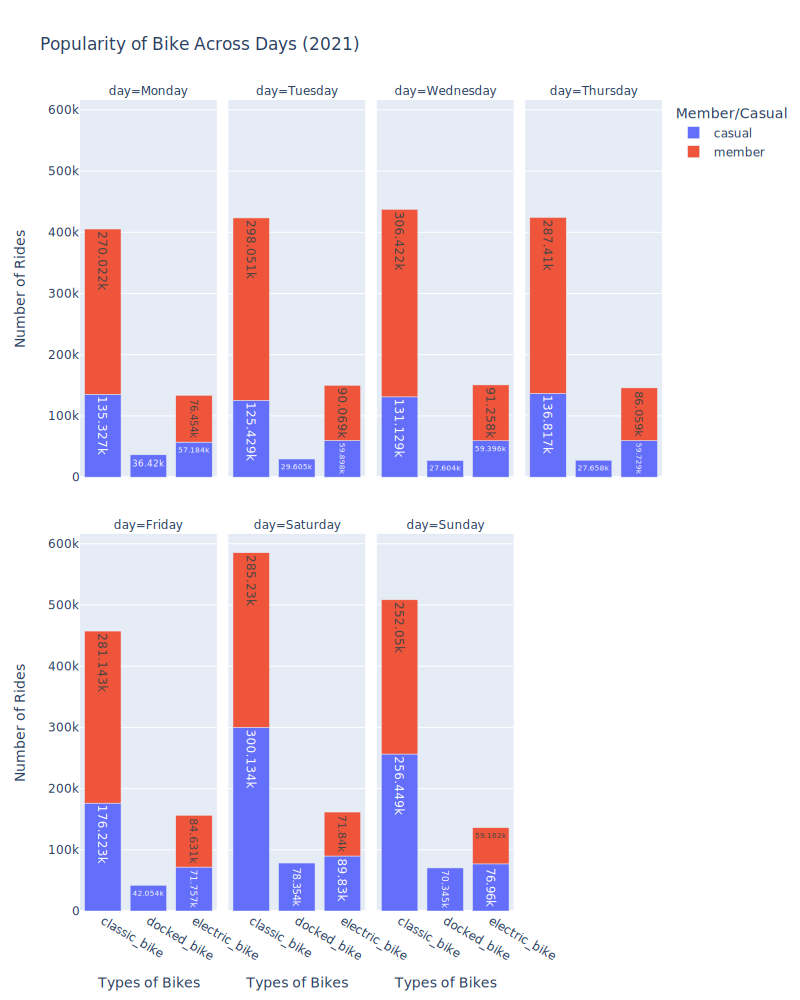

In [35]:
fig = px.bar(bikes_popularirty_day, x = 'rideable_type', y = 'ride_id', color = 'member_casual', facet_col = 'day',
       facet_col_wrap=4,
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'member_casual':'Member/Casual'},
        title = 'Popularity of Bike Across Days (2021)',
       text_auto=True, width = 800, height = 1000)

fig.show('svg')

In [36]:
bike_general = df.groupby(['rideable_type', 'day'], as_index = False)['ride_id'].count()
bike_general

,rideable_type,day,ride_id
0,classic_bike,Monday,405349
1,classic_bike,Tuesday,423480
2,classic_bike,Wednesday,437551
3,classic_bike,Thursday,424227
4,classic_bike,Friday,457366
5,classic_bike,Saturday,585364
6,classic_bike,Sunday,508499
7,docked_bike,Monday,36420
8,docked_bike,Tuesday,29605
9,docked_bike,Wednesday,27605


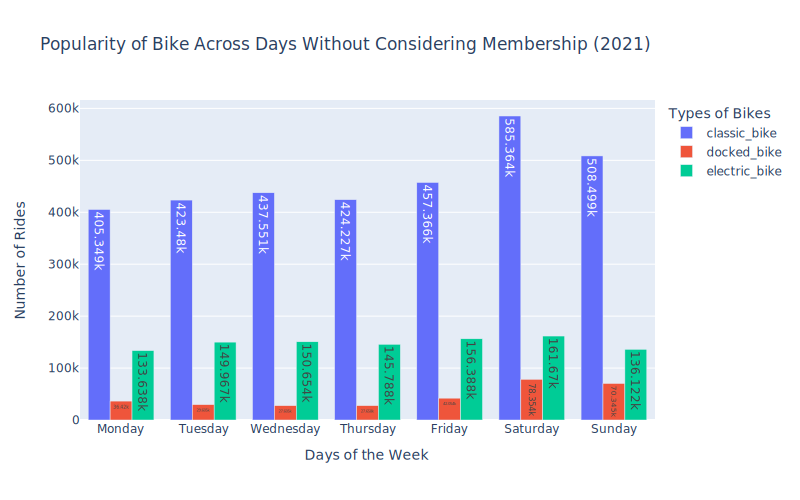

In [37]:
fig = px.bar(bike_general, x = 'day', y = 'ride_id', color = 'rideable_type', barmode='group', 
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'day': 'Days of the Week'},
        title = 'Popularity of Bike Across Days Without Considering Membership (2021)',
       text_auto=True, width = 800)

fig.show('svg')

From the 2 bar graphs that shows the bike popualrity, we obtain that:
1. **Classic bikes** were the **most popoular**, runner up were electric bikes, while docked bikes were the least popular.
2. This **trend is similar** for both casual riders and membered riders.

## 6. Act Phase
The "Act" phase is the phase where we execute the solutions to solve our problems. After receiving feedback and carry out improvements, we finally decide the best course of action. 


Deliverable: **Top three recommendations based on the analysis**

### 6.1 Top three recommendations based on the analysis
After carrying out different types of analysis including (1) analyzing the number of rides across hours, days and months, (2) duration of rides and (3) popularity of bikes, I identified several interesting trends, the mains ones were:
1. **Casual riders** rode the bikes mainly for **leisure**.
2. **Membered riders** rode the bikes mainly to go **to work routinely**.
3. **Casual riders** rode the bikes **2.5-3.0 times longer** than membered ride.
4. The **peak days** with the most riders were during **the weekend**.
5. The **peak months** with the most riders were during the **summer season (June - August)** due to warmer weathers.

According to these findings and the **main objective** of converting casual riders into annual members, my top 3 recommendations are:

1. Provide **better deals** for **longer ride durations**
    - Casual riders rode the bikes longer for leisure purposes.
    - If there were annual membership deals that **benefit longer ride durations**, these casual riders would be attracted to them.
    

2. Provide **better deals** during the **summer season/ the weekends**
    - Summer season and the weekends had the most amount of casual riders.
    - Provide **short term membership** for the summer season or the weekends would attract these casual riders that rode the bikes for leisure.
    - Once their short term membership ends, provide deals to continue their membership into an annual memberships.


3. Improve bike facilities **during the winter**
    - The winter season has cold harsh weather and accumulating snow that might affect the efficiency of bike routes, which led to greatly reduced riders.
    - Work with other parties to ensure bike routes are regularly mantained especially during the winter season.